<a href="https://colab.research.google.com/github/Super-Flex/MoGakSo/blob/main/CTBOJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import pandas as pd
data = pd.read_csv('input_problem.csv')
data.drop('problem_id', axis = 1, inplace = True)
print(data)

      difficulty  cpp_submit_code  cpp_submit_user  cpp_solved_user  \
0              0           258905           116482            80036   
1              0           212425           101076            77631   
2              0           100043            72276            63850   
3              1            91304            57756            49003   
4              0            69618            55479            50730   
...          ...              ...              ...              ...   
8194          10               78               40               39   
8195           5              143               37               31   
8196           7               45               30               29   
8197           9               51               36               35   
8198          18              124               54               50   

      cpp_avg_try_cnt  cpp_answer_percent  cpp_correct  cpp_print_format_err  \
0              2.1505              46.501        96324             

In [ ]:
data["total"] = data["cpp_solved_user"] + data["java_solved_user"] + data["python_solved_user"] + data["c_solved_user"]
print(data)

      difficulty  cpp_submit_code  cpp_submit_user  cpp_solved_user  \
0              0           258905           116482            80036   
1              0           212425           101076            77631   
2              0           100043            72276            63850   
3              1            91304            57756            49003   
4              0            69618            55479            50730   
...          ...              ...              ...              ...   
8194          10               78               40               39   
8195           5              143               37               31   
8196           7               45               30               29   
8197           9               51               36               35   
8198          18              124               54               50   

      cpp_avg_try_cnt  cpp_answer_percent  cpp_correct  cpp_print_format_err  \
0              2.1505              46.501        96324             

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data.drop(columns=['difficulty']), data["difficulty"], test_size=0.2, random_state=42 )
# print(X_train, X_test, y_train, y_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=300, max_depth=5,random_state=0)
clf.fit(train_x,train_y)

predict1 = clf.predict(test_x)
print(accuracy_score(test_y,predict1))


0.174390243902439


python_solved_user         0.093746
python_submit_user         0.064773
python_correct             0.064349
cpp_avg_try_cnt            0.063242
cpp_answer_percent         0.061648
python_avg_try_cnt         0.052048
python_answer_percent      0.050419
cpp_tle                    0.043339
cpp_submit_code            0.037744
python_submit_code         0.031138
cpp_correct                0.029346
cpp_runtime_err            0.023575
java_solved_user           0.023210
java_answer_percent        0.023059
cpp_submit_user            0.021590
python_tle                 0.020893
cpp_wrong                  0.020038
java_correct               0.020001
c_solved_user              0.019540
c_answer_percent           0.018098
cpp_mle                    0.018028
cpp_solved_user            0.017418
total                      0.016776
java_submit_user           0.014815
cpp_compile_err            0.014745
c_correct                  0.014247
python_mle                 0.013341
java_tle                   0

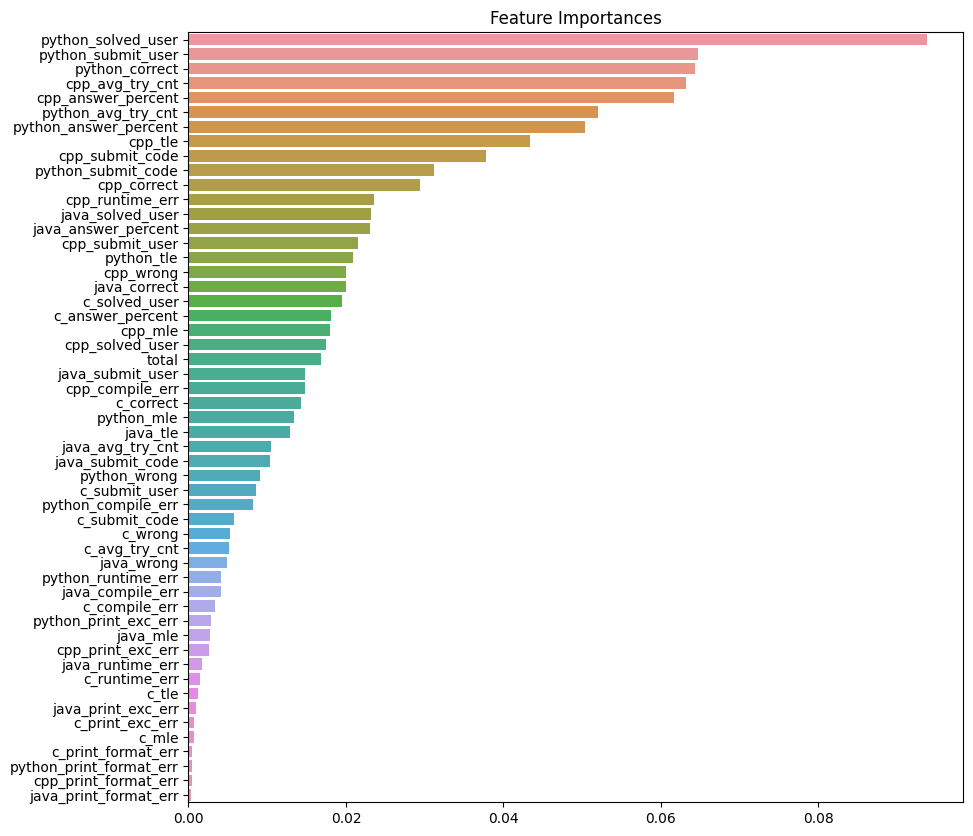

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = train_x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)
print(ftr_top)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [ ]:
data = pd.read_csv('input_problem.csv')
data2 = pd.read_csv('problem_tag.csv')
print(type(data),data2)
mdata = pd.merge(data, data2)
data.drop('problem_id', axis = 1, inplace = True)
# print(mdata)
one_hot_encoded = mdata['tags'].str.get_dummies(',')

# 원핫 인코딩된 결과를 기존 데이터프레임과 합칩니다.
data_encoded = pd.concat([mdata, one_hot_encoded], axis=1).drop(columns='tags')
ddata_encoded = data_encoded.drop('problem_id', axis = 1)


train_x, test_x, train_y, test_y = train_test_split(ddata_encoded.drop(columns=['difficulty']), ddata_encoded["difficulty"], test_size=0.2, random_state=42 )
# print(data_encoded)


<class 'pandas.core.frame.DataFrame'>       problem_id                             tags
0           2557                               구현
1           1000                       수학,구현,사칙연산
2           1001                       수학,구현,사칙연산
3          10718                               구현
4          10998                       수학,구현,사칙연산
...          ...                              ...
8137       12660                   다이나믹 프로그래밍,문자열
8138       12539                       브루트포스 알고리즘
8139       12267                               구현
8140       12050  그래프 이론,그래프 탐색,너비 우선 탐색,깊이 우선 탐색
8141       11677              그래프 이론,그래프 탐색,위상 정렬

[8142 rows x 2 columns]


python_solved_user       0.062820
python_correct           0.053253
cpp_avg_try_cnt          0.052001
cpp_answer_percent       0.047688
구현                       0.047535
사칙연산                     0.044223
python_answer_percent    0.041723
python_submit_user       0.039366
python_avg_try_cnt       0.036093
cpp_tle                  0.034049
java_answer_percent      0.027024
cpp_submit_code          0.026592
java_solved_user         0.025280
python_submit_code       0.023900
c_solved_user            0.022749
python_tle               0.020925
cpp_mle                  0.020489
cpp_correct              0.020213
cpp_submit_user          0.019140
c_answer_percent         0.018750
cpp_runtime_err          0.017779
java_submit_user         0.017254
java_avg_try_cnt         0.015672
java_correct             0.015408
cpp_solved_user          0.015115
c_correct                0.013786
cpp_wrong                0.013576
java_submit_code         0.012170
c_submit_user            0.012081
cpp_compile_er

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52825 (\N{HANGUL SYLLABLE CIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

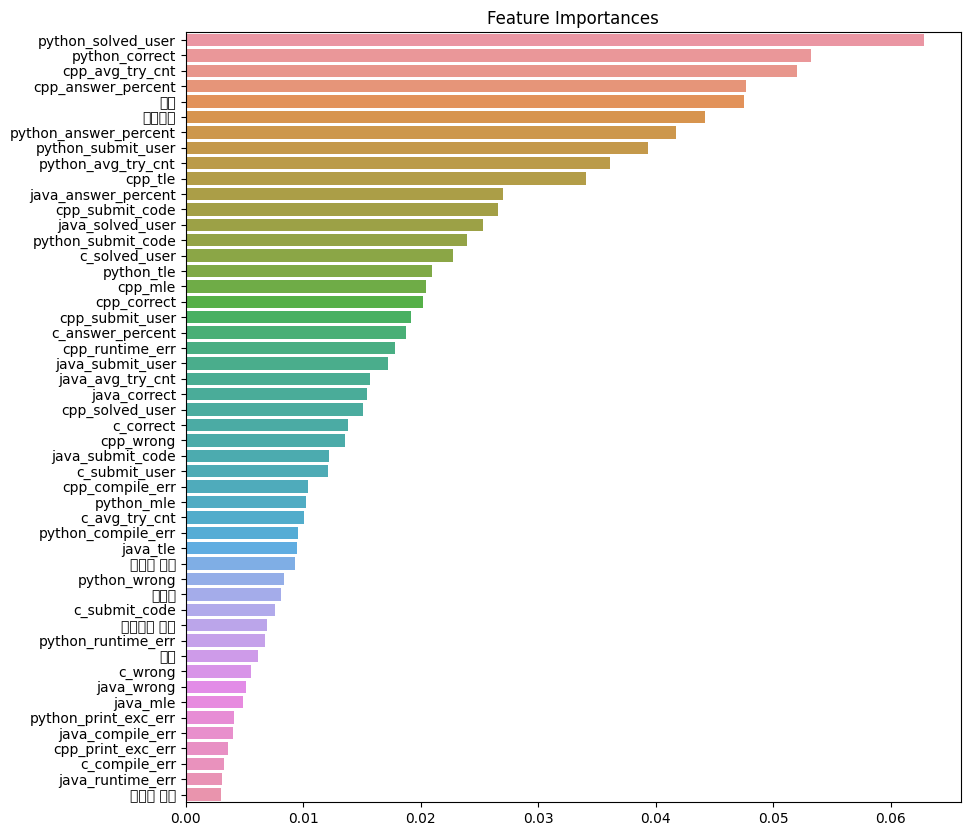

0.1878453038674033


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=300, max_depth=5,random_state=0)
clf.fit(train_x,train_y)

predict1 = clf.predict(test_x)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = train_x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:50]
print(ftr_top)
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
print(accuracy_score(test_y,predict1))


In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = { 'n_estimators' : [10, 100],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(train_x, train_y)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52825 (\N{HANGUL SYLLABLE CIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

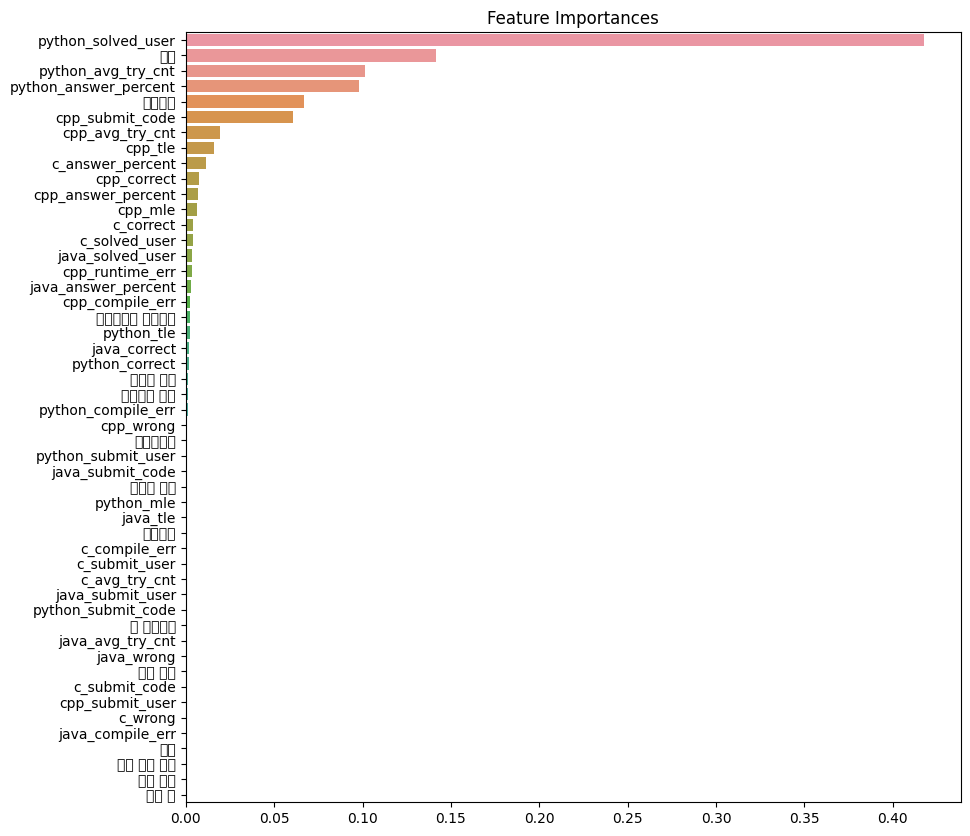

Mean Squared Error: 9.678778009859698


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# 데이터 준비 (예시로 임의의 데이터를 생성)
# train_x = pd.DataFrame(...)  # 훈련 데이터 x

# RandomForestRegressor 모델로 훈련
regressor = RandomForestRegressor(n_estimators=300, max_depth=5, random_state=0)
regressor.fit(train_x, train_y)

# 예측
predict1 = regressor.predict(test_x)

# 특성 중요도 계산
ftr_importances_values = regressor.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:50]
# print(ftr_top)

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 그래프 그리기
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

# 회귀 문제의 평가는 Mean Squared Error (평균 제곱 오차)를 사용
mse = mean_squared_error(test_y, predict1)
print("Mean Squared Error:", mse)


In [ ]:
data3 = pd.read_csv('problem_rating_cnt.csv')
full_data = pd.merge(data3, data_encoded)


train_x, test_x, train_y, test_y = train_test_split(full_data.drop(columns=['difficulty']), full_data["difficulty"], test_size=0.2, random_state=42 )
train_x.head()
# print(train_x.columns, len(train_x.columns), len(train_x))


,problem_id,rating_200_299,rating_300_399,rating_400_499,rating_500_599,rating_600_699,rating_700_799,rating_800_899,rating_900_999,rating_1000_1099,...,해싱,헝가리안,홀의 결혼 정리,확률론,확장 유클리드 호제법,회문 트리,회전하는 캘리퍼스,휴리스틱,희소 배열,히르쉬버그
5893,1078,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7664,26615,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3307,19541,1,1,0,1,1,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1149,21756,72,78,55,71,78,70,67,83,72,...,0,0,0,0,0,0,0,0,0,0
1870,5615,6,5,1,9,4,6,11,8,10,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52825 (\N{HANGUL SYLLABLE CIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

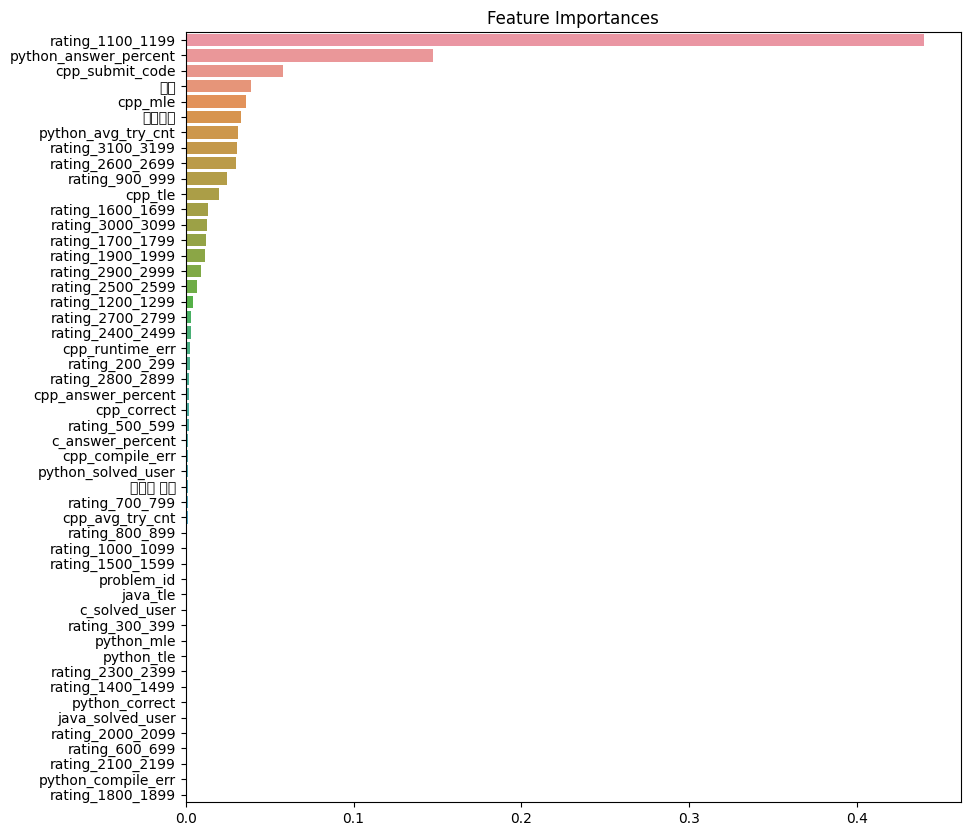

Mean Squared Error: 7.52042753845289


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52825 (\N{HANGUL SYLLABLE CIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

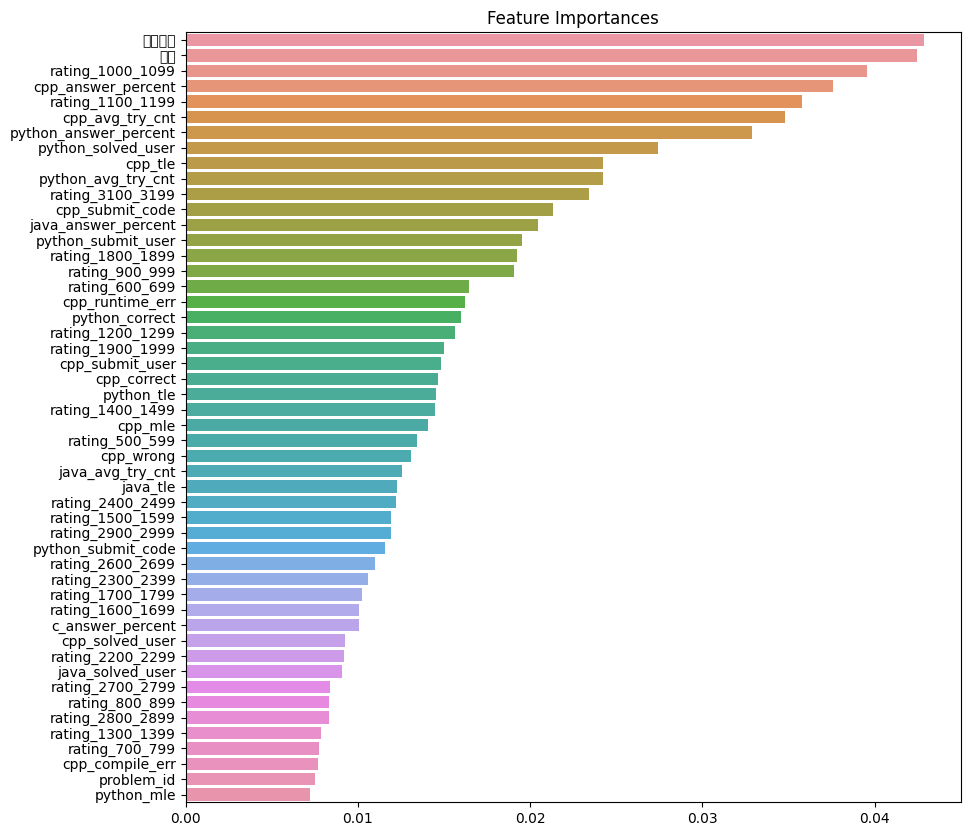

0.2169637369391518


In [ ]:

regressor = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=0)
regressor.fit(train_x, train_y)

# 예측
predict1 = regressor.predict(test_x)

# 특성 중요도 계산
ftr_importances_values = regressor.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:50]
# print(ftr_top)

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 그래프 그리기
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

# 회귀 문제의 평가는 Mean Squared Error (평균 제곱 오차)를 사용
mse = mean_squared_error(test_y, predict1)
print("Mean Squared Error:", mse)


clf = RandomForestClassifier(n_estimators=150, max_depth=5,random_state=0)
clf.fit(train_x,train_y)

predict1 = clf.predict(test_x)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = train_x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:50]
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
print(accuracy_score(test_y,predict1))

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# difficulty15이하
dif15_full_data = full_data[full_data['difficulty'] <= 15]
# dif15_full_data.drop('problem_id', axis=1, inplace=True)
train_x, test_x, train_y, test_y = train_test_split(dif15_full_data.drop(columns=['difficulty']), dif15_full_data["difficulty"], test_size=0.2, random_state=42 )

#정규화
scaler = StandardScaler()
train_x_normalized = scaler.fit_transform(train_x)
test_x_normalized = scaler.transform(test_x)
# train_y_normalized = scaler.fit_transform(train_y)
# test_y_normalized = scaler.transform(test_y)
train_x.head()
# print(len(train_x), dif15_full_data["difficulty"], len(dif15_full_data["difficulty"]))
# train_y.head()

,problem_id,rating_200_299,rating_300_399,rating_400_499,rating_500_599,rating_600_699,rating_700_799,rating_800_899,rating_900_999,rating_1000_1099,...,해싱,헝가리안,홀의 결혼 정리,확률론,확장 유클리드 호제법,회문 트리,회전하는 캘리퍼스,휴리스틱,희소 배열,히르쉬버그
7605,24092,1,1,0,2,1,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
2475,10840,1,1,0,2,5,2,2,5,3,...,1,0,0,0,0,0,0,0,0,0
3943,13363,0,1,0,3,4,4,1,6,7,...,0,0,0,0,0,0,0,0,0,0
6394,27246,0,0,0,1,1,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
5075,22388,0,0,0,3,2,0,4,3,4,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52825 (\N{HANGUL SYLLABLE CIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

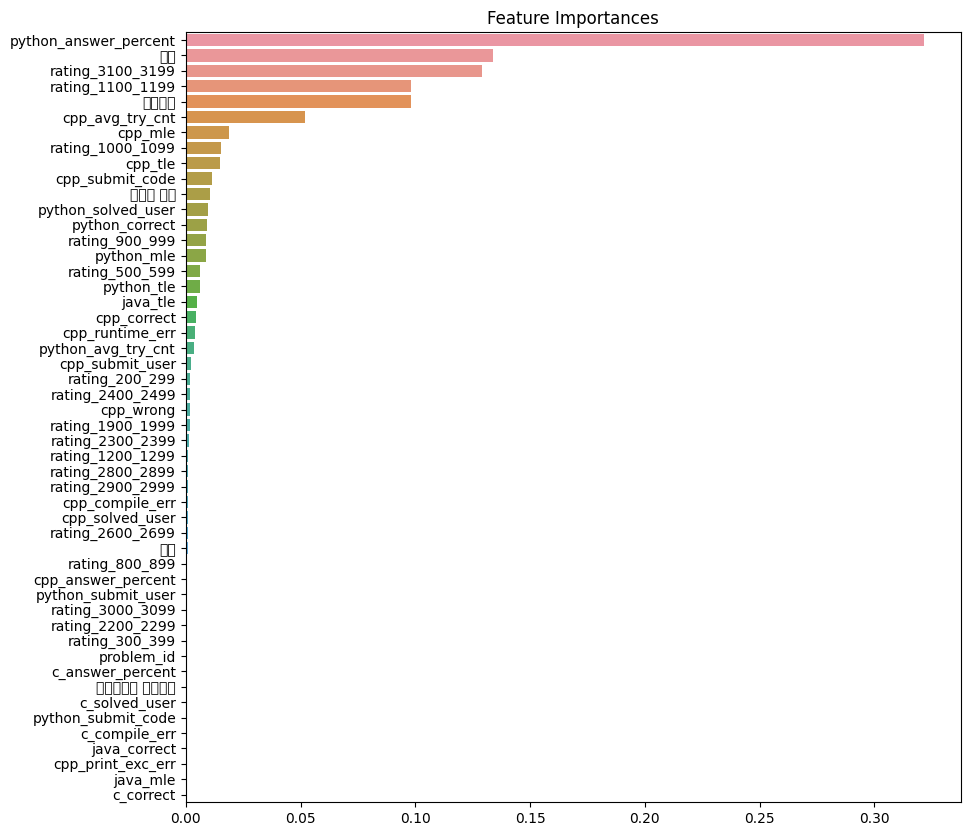

Mean Squared Error: 4.932014215883296


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52825 (\N{HANGUL SYLLABLE CIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

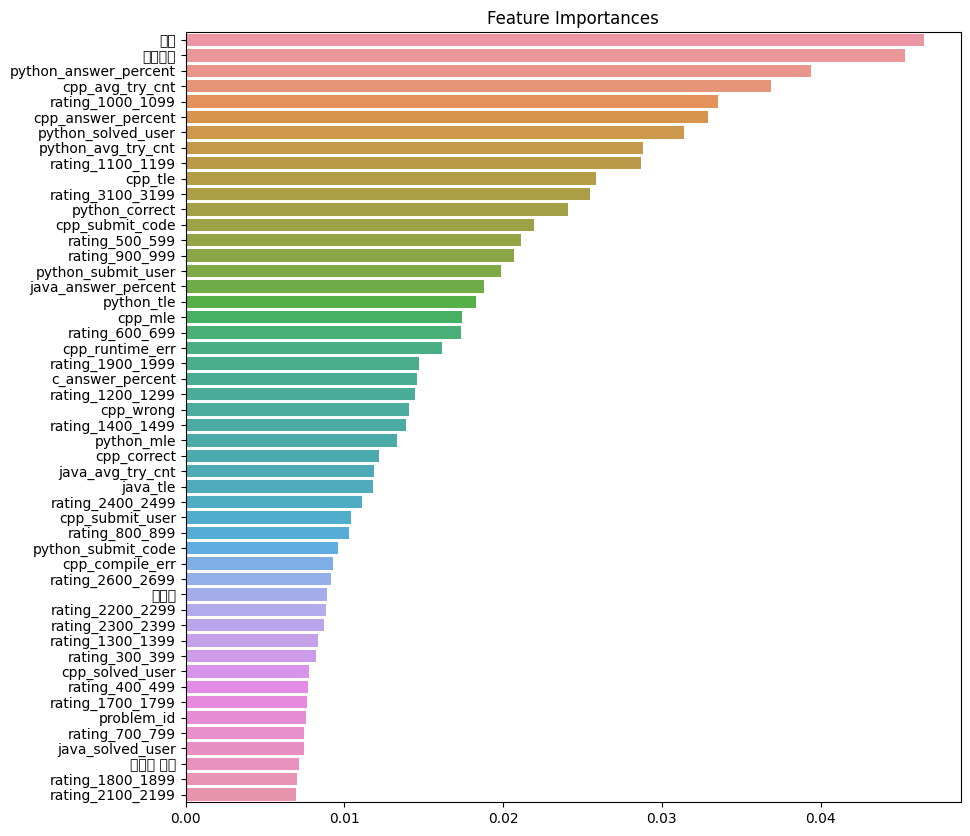

0.2566510172143975


In [ ]:

regressor = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=0)
regressor.fit(train_x, train_y)

# 예측
predict1 = regressor.predict(test_x)

# 특성 중요도 계산
ftr_importances_values = regressor.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:50]
# print(ftr_top)

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 그래프 그리기
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

# 회귀 문제의 평가는 Mean Squared Error (평균 제곱 오차)를 사용
mse = mean_squared_error(test_y, predict1)
print("Mean Squared Error:", mse)


clf = RandomForestClassifier(n_estimators=150, max_depth=5,random_state=0)
clf.fit(train_x,train_y)

predict1 = clf.predict(test_x)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = train_x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:50]
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
print(accuracy_score(test_y,predict1))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Setting up KMeans
kmeans = KMeans(n_clusters=10, random_state=42)  # Assuming you want 3 clusters
kmeans.fit(train_x)

# Predicting clusters
cluster_labels = kmeans.predict(test_x)

# Visualizing clusters using the first two features (as an example)
plt.scatter(test_x.iloc[:, 0], test_x.iloc[:, 1], c=cluster_labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X')
plt.title('KMeans Clusters')
plt.show()

# Evaluating the clustering using silhouette score
silhouette_avg = silhouette_score(test_x, cluster_labels)
print("Silhouette Score:", silhouette_avg)
Counter(cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

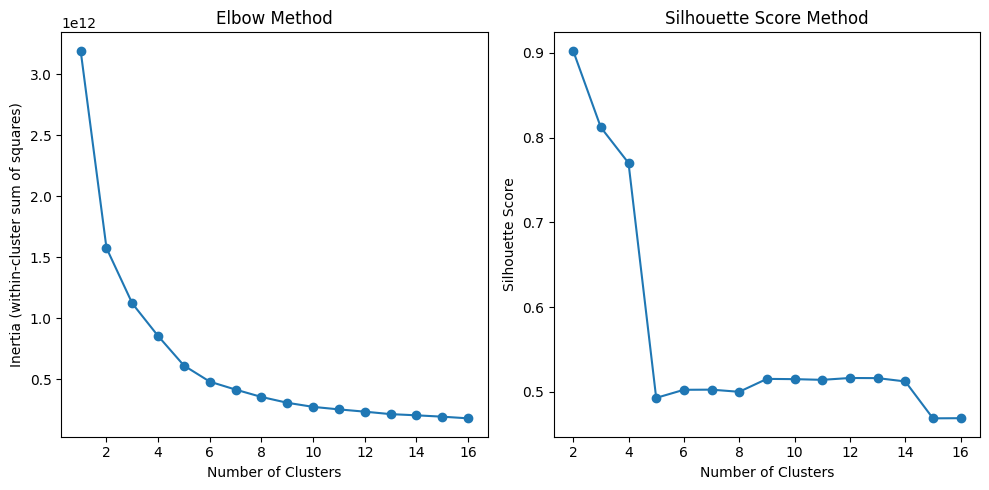

[(0, 14), (1, 470), (3, 4), (4, 30), (5, 74), (6, 326), (8, 352), (9, 8)]
[(0, 18), (1, 19), (2, 40), (3, 116), (4, 133), (5, 87), (6, 84), (7, 78), (8, 83), (9, 73), (10, 74), (11, 107), (12, 103), (13, 105), (14, 98), (15, 60)]


In [46]:
#정규화 데이터

# Setting up KMeans
# kmeans = KMeans(n_clusters=10, random_state=42)  # Assuming you want 3 clusters
# kmeans.fit(train_x_normalized)

# # Predicting clusters
# cluster_labels = kmeans.predict(test_x_normalized)

# # Visualizing clusters using the first two features (as an example)
# plt.scatter(test_x.iloc[:, 0], test_x.iloc[:, 1], c=cluster_labels, cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X')
# plt.title('KMeans Clusters')
# plt.show()

# # Evaluating the clustering using silhouette score
# silhouette_avg = silhouette_score(test_x, cluster_labels)
# print("Silhouette Score:", silhouette_avg)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-means 클러스터링 수행 및 엘보우 메서드를 사용하여 최적의 군집 개수 결정
inertia_values = []
silhouette_scores = []
max_clusters = 16

for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(train_x)
    inertia_values.append(kmeans.inertia_)

    if n_clusters > 1:
        silhouette_scores.append(silhouette_score(train_x, kmeans.labels_))

# 엘보우 메서드를 사용하여 최적의 군집 개수 결정
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters+1), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')

# 실루엣 스코어를 사용하여 최적의 군집 개수 결정
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()



print(sorted(list(Counter(cluster_labels).items()),key=lambda x : x[0]))
print(sorted(list(Counter(test_y).items()),key=lambda x : x[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


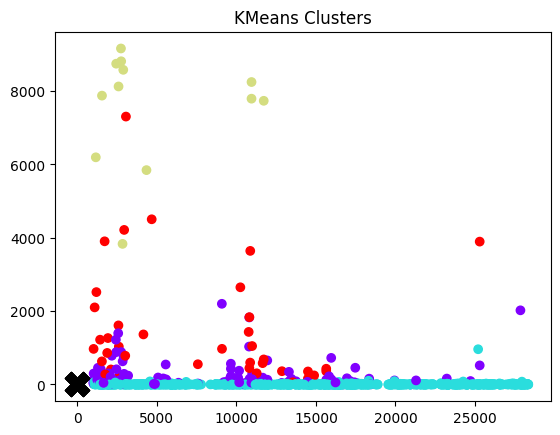

Silhouette Score: 0.4218285551026187
[(0, 166), (1, 1057), (2, 12), (3, 43)]
[(0, 18), (1, 19), (2, 40), (3, 116), (4, 133), (5, 87), (6, 84), (7, 78), (8, 83), (9, 73), (10, 74), (11, 107), (12, 103), (13, 105), (14, 98), (15, 60)]


In [47]:
#정규화 데이터

# Setting up KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Assuming you want 3 clusters
kmeans.fit(train_x_normalized)

# Predicting clusters
cluster_labels = kmeans.predict(test_x_normalized)

# Visualizing clusters using the first two features (as an example)
plt.scatter(test_x.iloc[:, 0], test_x.iloc[:, 1], c=cluster_labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X')
plt.title('KMeans Clusters')
plt.show()

# Evaluating the clustering using silhouette score
silhouette_avg = silhouette_score(test_x, cluster_labels)
print("Silhouette Score:", silhouette_avg)
print(sorted(list(Counter(cluster_labels).items()),key=lambda x : x[0]))
print(sorted(list(Counter(test_y).items()),key=lambda x : x[0]))

In [48]:
#입력에 따른 원래 출력과 예측
# for i in range(len(test_x)):
#     print("Data Point:", test_x.iloc[i].values[:4], "Predicted Cluster:", cluster_labels[i], "True Label:", test_y.iloc[i])
from collections import Counter
Counter(cluster_labels)

Counter({1: 1057, 0: 166, 3: 43, 2: 12})

In [ ]:
!pip install kmodes

from kmodes.kprototypes import KPrototypes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting up KPrototypes
kproto = KPrototypes(n_clusters=15, init='Cao', n_jobs=4, random_state=0)

# Assuming that the first few columns are numerical and the rest are categorical
# You need to specify the index of the first categorical attribute (0-indexed)
num_categorical = 83

clusters = kproto.fit_predict(train_x_normalized, categorical=[num_categorical])

# Visualizing clusters using the first two features (as an example)
plt.scatter(train_x.iloc[:, 0], train_x.iloc[:, 1], c=clusters, cmap='rainbow')
plt.title('K-Prototypes Clusters')
plt.xlabel(train_x.columns[0])  # 첫 번째 특성의 이름을 x축 레이블로 설정
plt.ylabel(train_x.columns[1])  # 두 번째 특성의 이름을 y축 레이블로 설정
plt.show()


In [ ]:
silhouette_avg = silhouette_score(train_x_normalized, clusters)
print("Silhouette Score:", silhouette_avg)

print(sorted(list(Counter(clusters).items()),key=lambda x : x[0]))
print(sorted(list(Counter(train_y).items()),key=lambda x : x[0]))

In [ ]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Try different values of n_clusters
n_clusters_range = range(2, 16)
silhouette_scores = []

for n_clusters in n_clusters_range:
    kproto = KPrototypes(n_clusters=n_clusters, init='Cao', n_jobs=4, random_state=0)
    clusters = kproto.fit_predict(train_x_normalized, categorical=[num_categorical])
    silhouette_scores.append(silhouette_score(train_x_normalized, clusters))

# Plot the silhouette scores for different n_clusters
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.show()


In [ ]:
from kmodes.kprototypes import KPrototypes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting up KPrototypes
kproto = KPrototypes(n_clusters=8, init='Cao', n_jobs=4, random_state=0)

# Assuming that the first few columns are numerical and the rest are categorical
# You need to specify the index of the first categorical attribute (0-indexed)
num_categorical = 83

clusters = kproto.fit_predict(train_x_normalized, categorical=[num_categorical])

# Visualizing clusters using the first two features (as an example)
plt.scatter(train_x.iloc[:, 0], train_x.iloc[:, 1], c=clusters, cmap='rainbow')
plt.title('K-Prototypes Clusters')
plt.xlabel(train_x.columns[0])  # 첫 번째 특성의 이름을 x축 레이블로 설정
plt.ylabel(train_x.columns[1])  # 두 번째 특성의 이름을 y축 레이블로 설정
plt.show()
silhouette_avg = silhouette_score(train_x_normalized, clusters)
print("Silhouette Score:", silhouette_avg)

print(sorted(list(Counter(clusters).items()),key=lambda x : x[0]))
print(sorted(list(Counter(train_y).items()),key=lambda x : x[0]))

In [ ]:
# Setting up KPrototypes
kproto = KPrototypes(n_clusters=5, init='Cao', n_jobs=4, random_state=0)

# Assuming that the first few columns are numerical and the rest are categorical
# You need to specify the index of the first categorical attribute (0-indexed)
num_categorical = 83

clusters = kproto.fit_predict(train_x_normalized, categorical=[num_categorical])

# Visualizing clusters using the first two features (as an example)
plt.scatter(train_x.iloc[:, 0], train_x.iloc[:, 1], c=clusters, cmap='rainbow')
plt.title('K-Prototypes Clusters')
plt.xlabel(train_x.columns[0])  # 첫 번째 특성의 이름을 x축 레이블로 설정
plt.ylabel(train_x.columns[1])  # 두 번째 특성의 이름을 y축 레이블로 설정
plt.show()
silhouette_avg = silhouette_score(train_x_normalized, clusters)
print("Silhouette Score:", silhouette_avg)

print(sorted(list(Counter(clusters).items()),key=lambda x : x[0]))
print(sorted(list(Counter(train_y).items()),key=lambda x : x[0]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
wcss = []
n_clusters_range = range(4, 16)

for n_clusters in n_clusters_range:
    kproto = KPrototypes(n_clusters=n_clusters, init='Cao', n_jobs=4, random_state=0)
    clusters = kproto.fit_predict(train_x_normalized, categorical=[num_categorical])
    wcss.append(kproto.cost_)

# Plot the Within-cluster sum of squares for different number of clusters
plt.plot(n_clusters_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.show()

In [ ]:
# for i in train_x.columns:
#     print(i)
train_x.columns[83]

In [ ]:
# import numpy as np

# # 실제 레이블과 예측이 다른 인스턴스의 인덱스를 찾습니다.
# diff_index = np.where(test_y != predict1)[0]

# # 이 인덱스를 사용하여 실제 레이블과 예측을 비교합니다.
# print(len(diff_index))
# for i in diff_index:
#     print("Actual labels:", test_y.iloc[i], predict1[i])


In [ ]:
# # only tag data
# tag = pd.read_csv('problem_tag.csv')
# level_tag = pd.read_csv('problem_50users.csv')
# only_tag = pd.merge(tag, level_tag)
# one_hot_encoded = only_tag['tags'].str.get_dummies(',')

# # 원핫 인코딩된 결과를 기존 데이터프레임과 합칩니다.
# data_encoded = pd.concat([only_tag, one_hot_encoded], axis=1).drop(columns='tags')
# ddata_encoded = data_encoded.drop('problem_id', axis = 1)


# train_x, test_x, train_y, test_y = train_test_split(ddata_encoded.drop(columns=['problem_level']), ddata_encoded["problem_level"], test_size=0.2, random_state=42 )

# clf = RandomForestClassifier(n_estimators=150, max_depth=5,random_state=0)
# clf.fit(train_x,train_y)

# predict1 = clf.predict(test_x)

# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# ftr_importances_values = clf.feature_importances_
# ftr_importances = pd.Series(ftr_importances_values, index = train_x.columns)
# ftr_top = ftr_importances.sort_values(ascending=False)[:50]
# plt.rc('font', family='NanumBarunGothic')
# plt.figure(figsize=(10,10))
# plt.title('Feature Importances')
# sns.barplot(x=ftr_top, y=ftr_top.index)
# plt.show()
# print(accuracy_score(test_y,predict1))

# # 15

# dif15_ddata_encoded = ddata_encoded[ddata_encoded['problem_level'] <= 15]
# print(dif15_ddata_encoded.head())
# train_x, test_x, train_y, test_y = train_test_split(dif15_ddata_encoded.drop(columns=['problem_level']), dif15_ddata_encoded["problem_level"], test_size=0.2, random_state=42 )

# clf = RandomForestClassifier(n_estimators=150, max_depth=5,random_state=0)
# clf.fit(train_x,train_y)

# predict1 = clf.predict(test_x)

# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# ftr_importances_values = clf.feature_importances_
# ftr_importances = pd.Series(ftr_importances_values, index = train_x.columns)
# ftr_top = ftr_importances.sort_values(ascending=False)[:50]
# plt.rc('font', family='NanumBarunGothic')
# plt.figure(figsize=(10,10))
# plt.title('Feature Importances')
# sns.barplot(x=ftr_top, y=ftr_top.index)
# plt.show()
# print(accuracy_score(test_y,predict1))